In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = '../Dataset/Embedding/'
outputFilename = 'delhiconventionalOutput.csv'

## With Word Embedding (BoW) Dataset

In [5]:
X = pd.read_csv(path+'delhi_WE_100.csv')
Y = pd.read_csv(path+'delhi_classLabel.csv')
print(X.shape,Y.shape)

(15438, 100) (15438, 1)


In [6]:
Y

,label
0,Others
1,Traffic information/advisory
2,Others
3,Others
4,Others
...,...
15433,Others
15434,Road closure
15435,Traffic congestion/heavy traffic
15436,Others


In [7]:
Y.label.value_counts()

Traffic obstruction/car breakdown    4831
Others                               3459
Traffic congestion/heavy traffic     2821
Road closure                         1487
Water logging                        1156
Traffic information/advisory         1001
City program                          416
Accident                              267
Name: label, dtype: int64

In [8]:
labels = Y.label.unique()
labels.sort()
labels

array(['Accident', 'City program', 'Others', 'Road closure',
       'Traffic congestion/heavy traffic', 'Traffic information/advisory',
       'Traffic obstruction/car breakdown', 'Water logging'], dtype=object)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y['label'])
print(X_train.shape, X_test.shape)

(11578, 100) (3860, 100)


In [11]:
model = GaussianNB()

model.fit(X_train,y_train)

GaussianNB()

In [12]:
y_pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)
pred_proba

array([[3.43996247e-13, 2.87993962e-14, 1.42249295e-19, ...,
        9.99999955e-01, 3.75024603e-22, 2.55894008e-16],
       [6.59752698e-08, 5.25144640e-14, 4.44604708e-27, ...,
        1.23454935e-31, 8.46986406e-07, 9.22182248e-17],
       [8.38945871e-16, 1.35614154e-05, 9.99986438e-01, ...,
        3.04600145e-20, 6.21382914e-25, 3.48426240e-15],
       ...,
       [7.98279233e-09, 3.04002253e-07, 2.38039053e-16, ...,
        6.66418685e-21, 2.95291950e-15, 5.75872246e-21],
       [1.19819680e-16, 4.51070670e-09, 9.99999995e-01, ...,
        9.64893759e-34, 5.46519416e-19, 7.28279534e-12],
       [1.57009655e-16, 3.75345649e-30, 2.86187427e-37, ...,
        2.84150771e-60, 1.00000000e+00, 9.73183881e-31]])

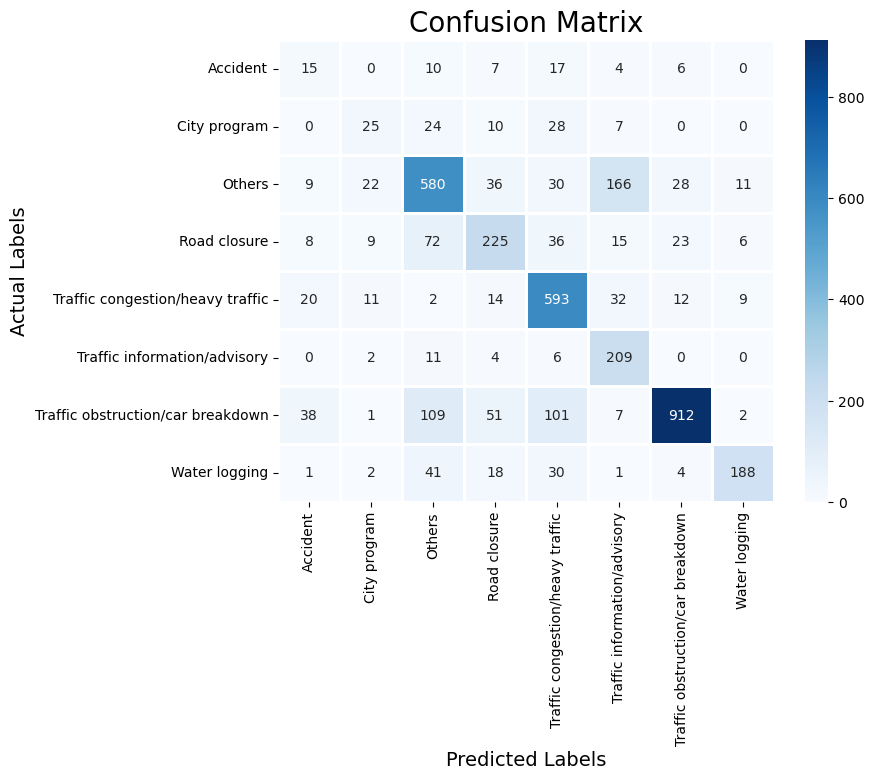

In [13]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8, 6))
cm = pd.DataFrame(cm , index = [i for i in labels] , columns = [i for i in labels])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [14]:
# return (y_test, prediction)
print(classification_report(y_test, y_pred))
f1 = f1_score(y_true = y_test, y_pred = y_pred, labels = labels, average = 'micro')

print('F1-score: ',f1*100,'%')

                                   precision    recall  f1-score   support

                         Accident       0.16      0.25      0.20        59
                     City program       0.35      0.27      0.30        94
                           Others       0.68      0.66      0.67       882
                     Road closure       0.62      0.57      0.59       394
 Traffic congestion/heavy traffic       0.71      0.86      0.77       693
     Traffic information/advisory       0.47      0.90      0.62       232
Traffic obstruction/car breakdown       0.93      0.75      0.83      1221
                    Water logging       0.87      0.66      0.75       285

                         accuracy                           0.71      3860
                        macro avg       0.60      0.61      0.59      3860
                     weighted avg       0.74      0.71      0.72      3860

F1-score:  71.16580310880829 %


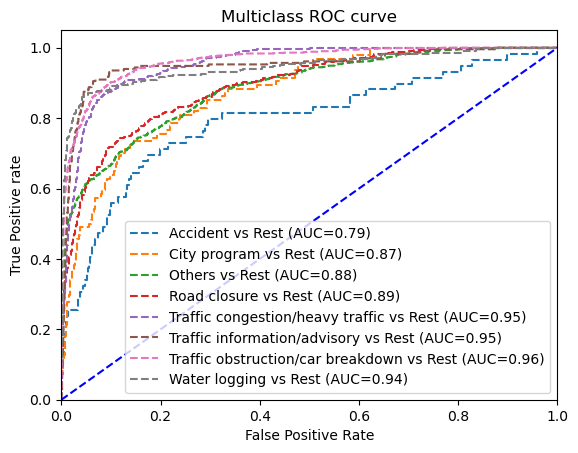

In [15]:
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve,auc
pred_prob = pred_proba
from sklearn.preprocessing import label_binarize
#binarize the y_values

classes = np.unique(y_test)
y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

# n_class = len(labels)

for i in range(len(classes)):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # plotting
    plt.plot(fpr[i], tpr[i], linestyle='--',
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [16]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
precision, recall, fscore,_  = score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, pred_prob,multi_class='ovr')
print('Accuracy, precision, recall, fscore, Roc-AUC')
print('{:.3f},{:.3f},{:.3f},{:.3f},{:.3f}'.format(accuracy,precision,recall,fscore,roc_auc))

Accuracy, precision, recall, fscore, Roc-AUC
0.712,0.598,0.614,0.592,0.907


In [17]:
import sys

with open(outputFilename, 'a') as f:
    print('GNB-w2v,{:.3f},{:.3f},{:.3f},{:.3f},{:.3f}'.format(accuracy,precision,recall,fscore,roc_auc), file=f)

## With Infersent Embedding

In [21]:
X = pd.read_csv(path+'delhi_infercent_4096_2.csv')
# Y = pd.read_csv(path+'kolkata_classLabel_named.csv')
print(X.shape,Y.shape)

(15438, 4097) (15438, 1)


In [26]:
X = X.iloc[:,1:]
X.shape

(15438, 4096)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, Y['label'])
print(X_train.shape, X_test.shape)

(11578, 4096) (3860, 4096)


In [29]:
model = GaussianNB()
model.fit(X_train,y_train)


GaussianNB()

In [30]:
y_pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)
pred_proba

array([[0.00000000e+000, 0.00000000e+000, 8.85673101e-046, ...,
        1.00000000e+000, 0.00000000e+000, 1.92505025e-266],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        1.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 1.00000000e+000],
       ...,
       [0.00000000e+000, 1.51776408e-261, 1.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 1.41672422e-264],
       [2.56309270e-130, 4.92285139e-166, 3.11903753e-105, ...,
        0.00000000e+000, 2.44452484e-108, 8.05814985e-175],
       [0.00000000e+000, 5.69269948e-207, 0.00000000e+000, ...,
        0.00000000e+000, 7.99107344e-090, 1.00000000e+000]])

In [31]:
# return (y_test, prediction)
print(classification_report(y_test, y_pred))
f1 = f1_score(y_true = y_test, y_pred = y_pred, labels = labels, average = 'micro')

print('F1-score: ',f1*100,'%')

                                   precision    recall  f1-score   support

                         Accident       0.29      0.66      0.40        65
                     City program       0.33      0.52      0.41        96
                           Others       0.79      0.69      0.73       888
                     Road closure       0.57      0.58      0.57       367
 Traffic congestion/heavy traffic       0.68      0.80      0.73       663
     Traffic information/advisory       0.61      0.83      0.71       257
Traffic obstruction/car breakdown       0.95      0.79      0.86      1240
                    Water logging       0.91      0.78      0.84       284

                         accuracy                           0.74      3860
                        macro avg       0.64      0.71      0.66      3860
                     weighted avg       0.78      0.74      0.75      3860

F1-score:  74.27461139896373 %


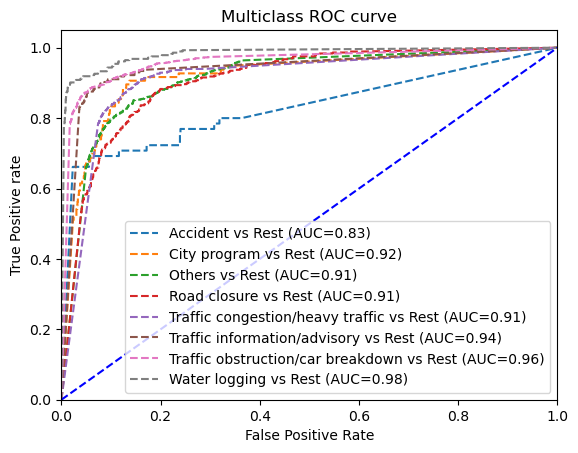

In [32]:
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve,auc
pred_prob = pred_proba
from sklearn.preprocessing import label_binarize
#binarize the y_values

classes = np.unique(y_test)
y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

# n_class = len(labels)

for i in range(len(classes)):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # plotting
    plt.plot(fpr[i], tpr[i], linestyle='--',
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [33]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
precision, recall, fscore,_  = score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, pred_prob,multi_class='ovr')
print('Accuracy, precision, recall, fscore, Roc-AUC')
print('{:.3f},{:.3f},{:.3f},{:.3f},{:.3f}'.format(accuracy,precision,recall,fscore,roc_auc))

Accuracy, precision, recall, fscore, Roc-AUC
0.743,0.642,0.707,0.658,0.921


In [34]:
import sys

with open(outputFilename, 'a') as f:
    print('GNB-infercent,{:.3f},{:.3f},{:.3f},{:.3f},{:.3f}'.format(accuracy,precision,recall,fscore,roc_auc), file=f)